In [0]:
%matplotlib inline
import cv2 #　opencvのインポート
import matplotlib
import matplotlib.pyplot as plt # matplotlib(描画用)
import numpy as np

print('opencv version: ' + cv2.__version__)
print('matplotlib version: ' + matplotlib.__version__)
print('numpy version: ' + np.__version__)

opencv version: 4.1.2
matplotlib version: 3.2.1
numpy version: 1.18.4


In [0]:
# このセルはGoogle Colaboratory使用時のみ必要
from google.colab import files
f = files.upload() # ファイルアップロード

Saving butterfly.jpg to butterfly.jpg


> 5.8. Build a Harris corner detector; for each corner, estimate scale and orientation as we have described.

cv2.cornerHarrisによってHarrisのコーナー検出を実装した.

途中のDilate関数は最初の2つの画像を見比べると分かるように, 最後に特徴量Rが大きい場所を赤でプロットしたときに見やすくするために膨張していることが分かる.

min: 0.0
max: 281650460.0
corner count: 5357


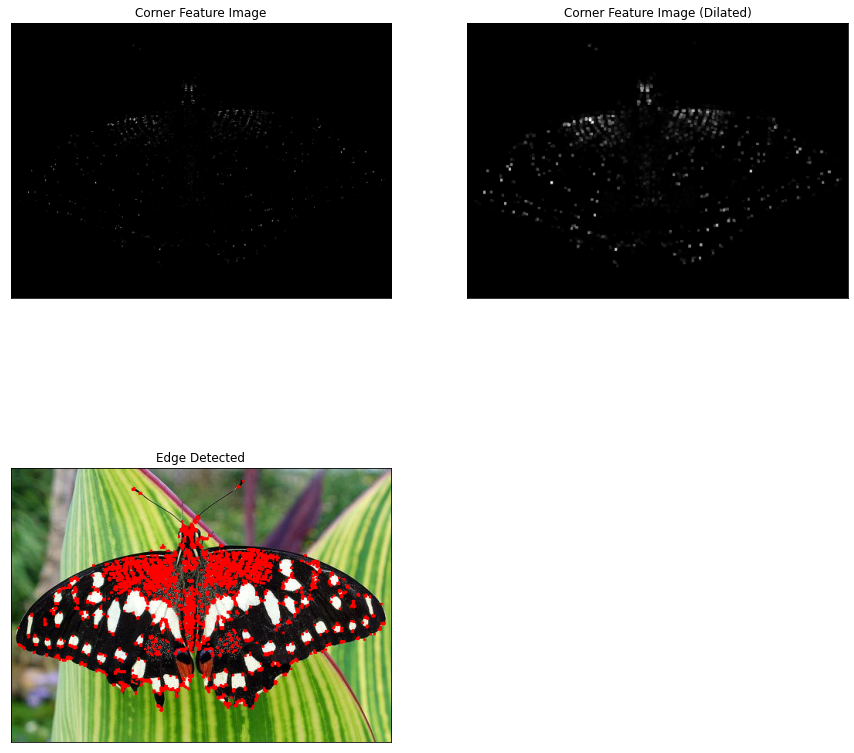

In [0]:
np.set_printoptions(threshold=np.inf)

filename = 'butterfly.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst[dst < 0] = 0  # R < 0の箇所を0へ
dst_dilated = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_colored = img.copy()
img_colored[dst_dilated>0.01*dst_dilated.max()]=[0,0,255]
#corner_value = dst[dst>0.01*dst.max()]
corner_count = np.count_nonzero(dst>0.01*dst.max())

plt.figure(figsize=(15, 15))
#plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.subplot(221),plt.imshow(dst, cmap='gray')
plt.title('Corner Feature Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(dst_dilated, cmap='gray')
plt.title('Corner Feature Image (Dilated)'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(cv2.cvtColor(img_colored,cv2.COLOR_BGR2RGB))
plt.title('Edge Detected'), plt.xticks([]), plt.yticks([])

print('min: ' + str(dst.min()))
print('max: ' + str(dst.max()))
print('corner count: ' + str(corner_count))
#print(corner_value)



17094


(Text(0.5, 1.0, 'Corner Feature height halfed Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

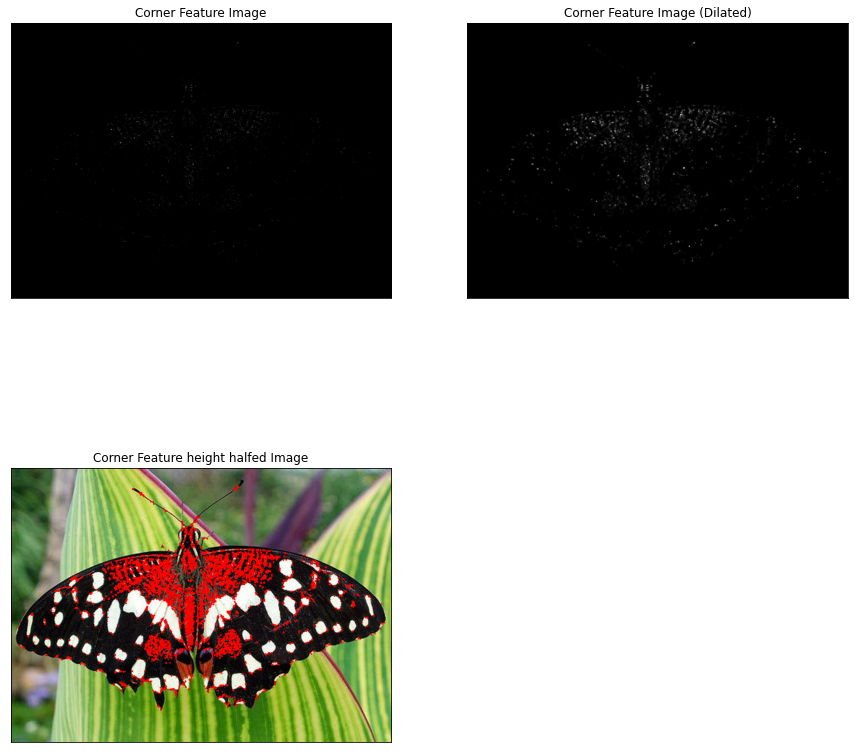

In [0]:
# スケール
plt.figure(figsize=(15, 15))

image_half = cv2.resize(img,None,fx=2,fy=2,interpolation = cv2.INTER_CUBIC)
gray_half = cv2.cvtColor(image_half,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray_half,2,3,0.04)

dst[dst < 0] = 0  # R < 0の箇所を0へ
dst_dilated = cv2.dilate(dst,None)

corner_count = np.count_nonzero(dst>0.01*dst.max())
print(corner_count)

# Threshold for an optimal value, it may vary depending on the image.
img_colored2 = image_half.copy()
img_colored2[dst_dilated>0.01*dst_dilated.max()]=[0,0,255]

plt.subplot(221),plt.imshow(dst, cmap='gray')
plt.title('Corner Feature Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(dst_dilated, cmap='gray')
plt.title('Corner Feature Image (Dilated)'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(cv2.cvtColor(img_colored2,cv2.COLOR_BGR2RGB))
plt.title('Corner Feature height halfed Image'), plt.xticks([]), plt.yticks([])

4319


(Text(0.5, 1.0, 'Corner Feature height halfed Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

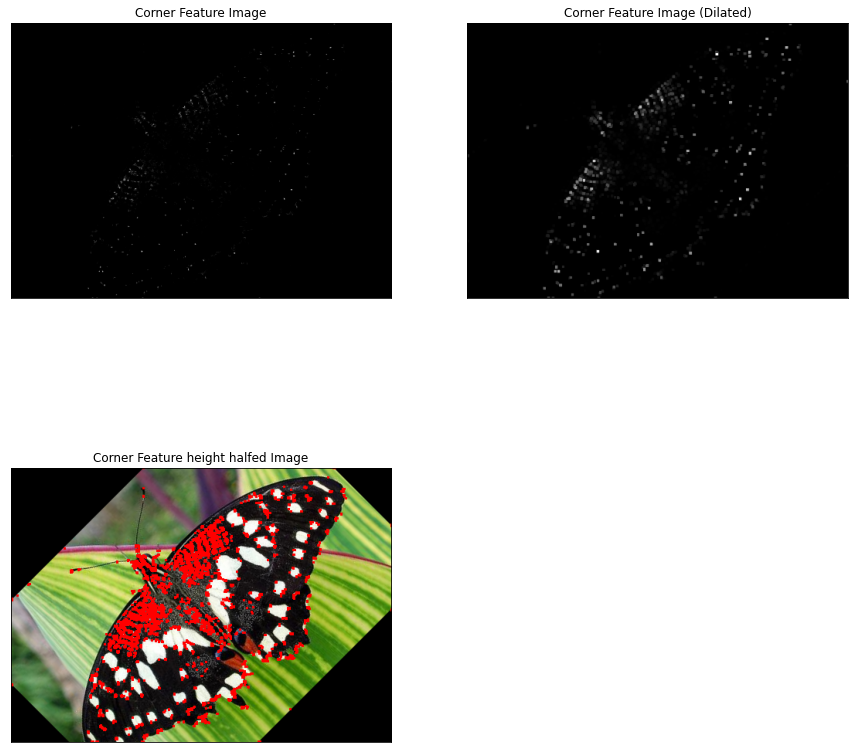

In [0]:
# 回転

height,width = img.shape[:2]
center = (int(width/2), int(height/2)) # 中心点
angle = 45 # 左回転
M = cv2.getRotationMatrix2D(center, angle, 1)

image_rotated = cv2.warpAffine(img, M, (width, height))
gray_rotated = cv2.cvtColor(image_rotated,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray_rotated,2,3,0.04)

dst[dst < 0] = 0  # R < 0の箇所を0へ
dst_dilated = cv2.dilate(dst,None)

corner_count = np.count_nonzero(dst>0.01*dst.max())
print(corner_count)

plt.figure(figsize=(15, 15))

# Threshold for an optimal value, it may vary depending on the image.
img_colored3 = image_rotated.copy()
img_colored3[dst_dilated>0.01*dst_dilated.max()]=[0,0,255]

plt.subplot(221),plt.imshow(dst, cmap='gray')
plt.title('Corner Feature Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(dst_dilated, cmap='gray')
plt.title('Corner Feature Image (Dilated)'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(cv2.cvtColor(img_colored3,cv2.COLOR_BGR2RGB))
plt.title('Corner Feature height halfed Image'), plt.xticks([]), plt.yticks([])

5297


Text(0.5, 1.0, 'Corner Feature height halfed Image')

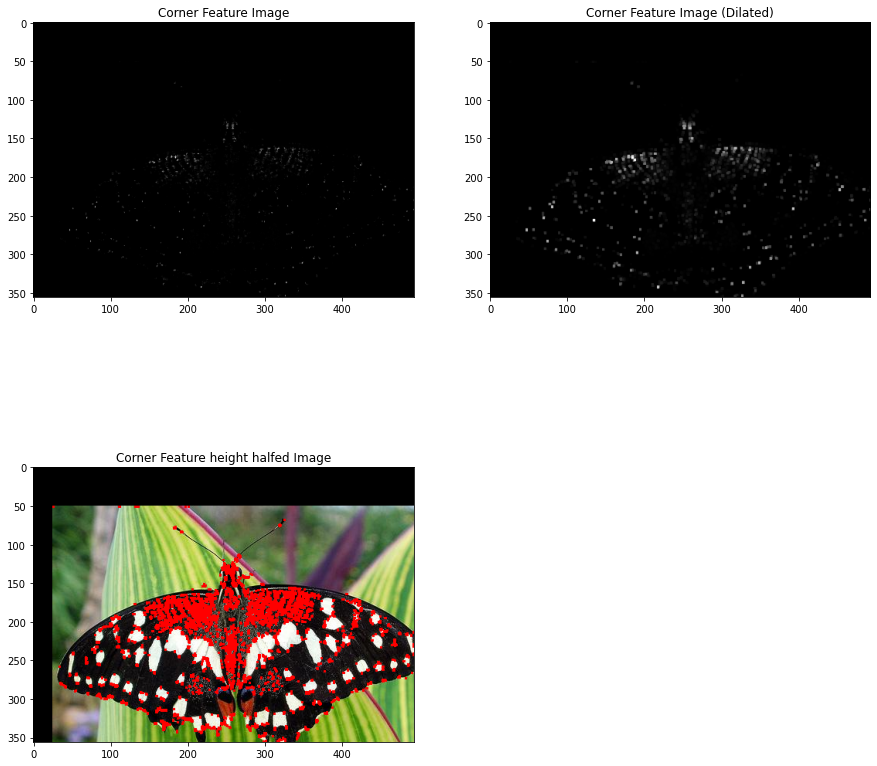

In [0]:
# 移動

moving_x = 25
moving_y = 50
M = np.float32([[1, 0, moving_x], [0, 1, moving_y]])

image_shifted = cv2.warpAffine(img, M, (width, height))
gray_shifted = cv2.cvtColor(image_shifted,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray_shifted,2,3,0.04)

dst[dst < 0] = 0  # R < 0の箇所を0へ
dst_dilated = cv2.dilate(dst,None)

corner_count = np.count_nonzero(dst>0.01*dst.max())
print(corner_count)

plt.figure(figsize=(15, 15))

# Threshold for an optimal value, it may vary depending on the image.
img_colored4 = image_shifted.copy()
img_colored4[dst_dilated>0.01*dst_dilated.max()]=[0,0,255]

plt.subplot(221),plt.imshow(dst, cmap='gray')
plt.title('Corner Feature Image')
plt.subplot(222),plt.imshow(dst_dilated, cmap='gray')
plt.title('Corner Feature Image (Dilated)')

plt.subplot(223),plt.imshow(cv2.cvtColor(img_colored4,cv2.COLOR_BGR2RGB))
plt.title('Corner Feature height halfed Image')

Text(0.5, 1.0, 'Translate')

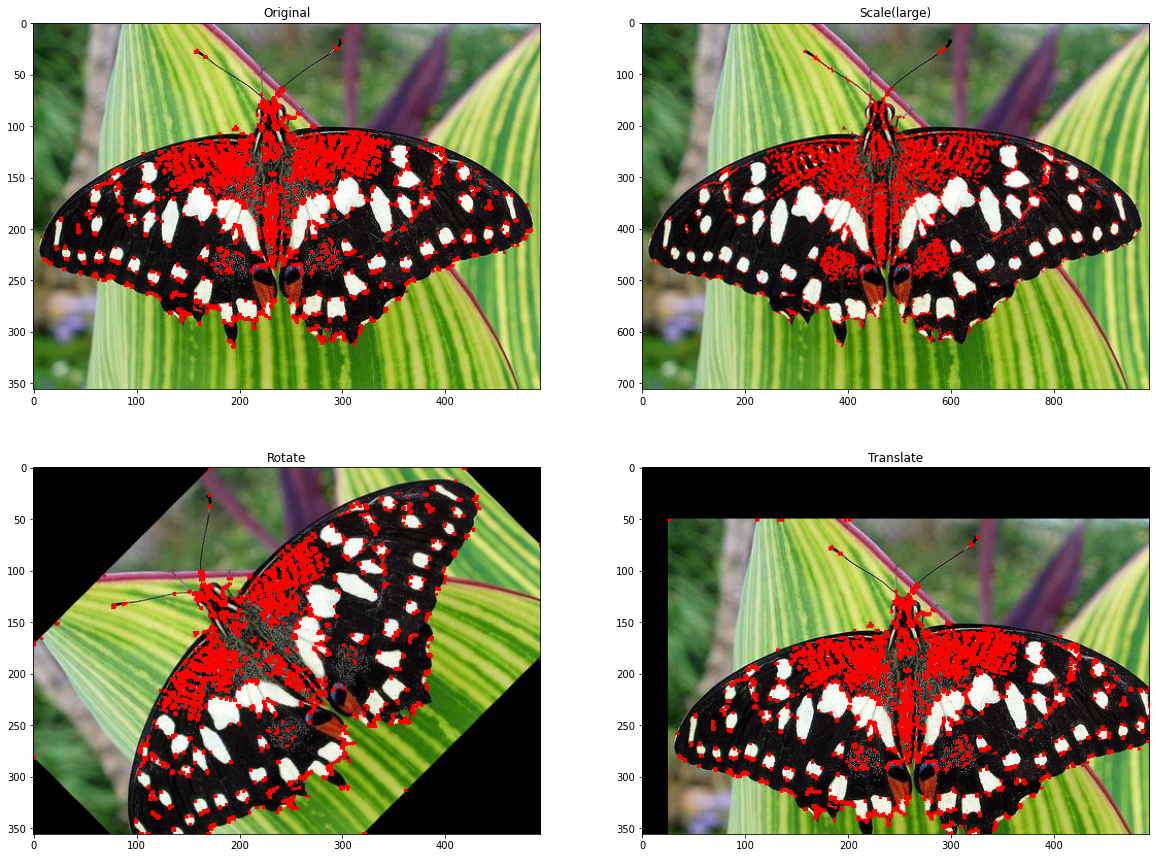

In [0]:
plt.figure(figsize=(20, 15))

plt.subplot(221),plt.imshow(cv2.cvtColor(img_colored,cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(222),plt.imshow(cv2.cvtColor(img_colored2,cv2.COLOR_BGR2RGB))
plt.title('Scale(large)')

plt.subplot(223),plt.imshow(cv2.cvtColor(img_colored3,cv2.COLOR_BGR2RGB))
plt.title('Rotate')

plt.subplot(224),plt.imshow(cv2.cvtColor(img_colored4,cv2.COLOR_BGR2RGB))
plt.title('Translate')

> Now test how well your list of neighborhoods behaves under rotation, translation, and scale of the image. You can do this by a simple exercise in matching. For each test image, prepare a rotated, translated, and scaled version of that image. Now you know where each neighborhood should appear in the new version of the image — check how often something of the right size and orientation appears in the right place.

butterfly.jpgに対して縦横2倍拡大,  回転, 平行移動の処理を加え, それぞれについて特徴量を取った結果を示した.
一見概ねすべての画像で同じ部分を特徴として捉えているように見える.
（ただし, 回転と平行移動で出てきた黒枠部分の端を除く.）
（スケール画像は拡大しているため特徴量のプロットが他のものと比べて小さく見えてしまうが.）

> You should find that rotation and translation cause no significant problems, but large scale changes can be an issue.

しかし角の先の部分を見てみると, スケール以外は同じ特徴を抽出しているのに対して, スケールではほとんど異なった特徴量が示されている.
これはマッチングの際に問題となることが分かる.
